In [1]:
# Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Read The Toronto Listings AirBnb Data as of August 9, 2021
airbnb = pd.read_csv("listings.csv")
airbnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.646170,-79.424510,Entire home/apt,469,28,7,12/4/17,0.09,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.641050,-79.376280,Private room,94,180,169,8/27/13,1.56,2,365
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.696020,-79.454680,Private room,72,28,217,10/10/18,1.79,2,365
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,Greenwood-Coxwell,43.668900,-79.325920,Entire home/apt,45,365,26,6/25/11,0.21,1,159
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,Mount Pleasant West,43.699580,-79.388140,Entire home/apt,75,30,7,10/17/18,0.10,1,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,Kensington-Chinatown,43.652616,-79.399845,Entire home/apt,71,28,0,NaN,NaN,6,62
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,Waterfront Communities-The Island,43.645297,-79.388957,Entire home/apt,109,28,0,NaN,NaN,4,151
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,Dovercourt-Wallace Emerson-Junction,43.664231,-79.442823,Entire home/apt,106,1,0,NaN,NaN,5,89
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,Waterfront Communities-The Island,43.643826,-79.379908,Entire home/apt,263,1,0,NaN,NaN,4,88


In [2]:
#Check the amount of rows in the data
len(airbnb)

15084

In [3]:
#Check data types
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
#Check total null values in the data
airbnb.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            7
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3475
reviews_per_month                 3475
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
# Drop any columns that are not really necessary to the data
airbnb.drop (['id','host_name','last_review'], axis = 1, inplace = True)

In [6]:
#See the changes in the first 5 datasets now
airbnb.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Beautiful home in amazing area!,1565,Little Portugal,43.64617,-79.42451,Entire home/apt,469,28,7,0.09,1,0
1,Downtown Harbourfront Private Room,22795,Waterfront Communities-The Island,43.64105,-79.37628,Private room,94,180,169,1.56,2,365
2,Queen Bedroom close to downtown,93825,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,28,217,1.79,2,365
3,Executive Studio Unit- Ideal for One Person,118124,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,0.21,1,159
4,"Safe, Central, Quiet and Great Amenities!",86838,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,75,30,7,0.10,1,345


In [7]:
#Replace all the NaN values in revies_per_month column with '0'
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
# See the changes
airbnb.isnull().sum()

#No more null values in reviews_per_month column

name                              1
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
#See the host_id that have the most listings on Airbnb
top_host = airbnb.host_id.value_counts()

In [10]:
#See the first 10 results of the highest host_id
top_host.head(10)

10202618     71
785826       60
135718015    46
846505       46
327456656    36
54422135     32
26743967     30
342316738    29
301014754    27
339842916    25
Name: host_id, dtype: int64

In [11]:
#Make the table for this data
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index':'Host_ID', 'host_id':'Total_Reviews'}, inplace=True)

In [12]:
#See the results
top_host_df.head(10)

,Host_ID,Total_Reviews
0,10202618,71
1,785826,60
2,135718015,46
3,846505,46
4,327456656,36
5,54422135,32
6,26743967,30
7,342316738,29
8,301014754,27
9,339842916,25


In [13]:
#See the roomtype in the dataset
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

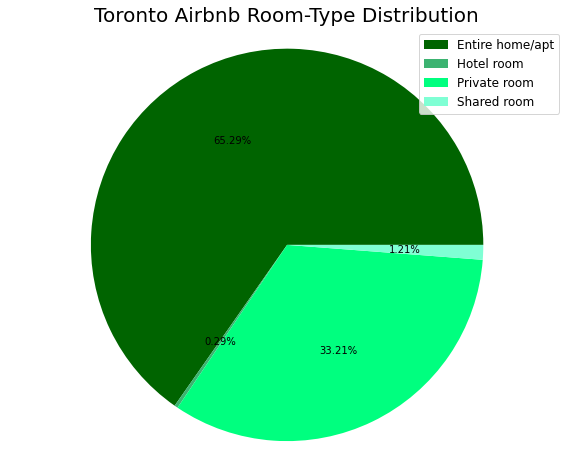

In [14]:
# Make a pie-chart for the distribution of the rental-type in Toronto
room_type = airbnb.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['darkgreen', 'mediumseagreen','springgreen','aquamarine'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Toronto Airbnb Room-Type Distribution', fontsize='20',color='black')
plt.show()
plt.close()

In [15]:
#See the number of neighbourhood in the dataset
len(airbnb.neighbourhood.unique())

140

In [16]:
#See the top 10 neighbourhood 
top_neighbourhood = airbnb.neighbourhood.value_counts().head(10)
top_neighbourhood

Waterfront Communities-The Island      2647
Niagara                                 628
Church-Yonge Corridor                   496
Annex                                   481
Bay Street Corridor                     451
Trinity-Bellwoods                       399
Kensington-Chinatown                    399
Dovercourt-Wallace Emerson-Junction     376
Willowdale East                         375
Moss Park                               350
Name: neighbourhood, dtype: int64

In [17]:
#Set the figure size and style for the visualization
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [18]:
#Make a table
top_neighbourhood_df = pd.DataFrame(top_neighbourhood)
top_neighbourhood_df.reset_index(inplace=True)
top_neighbourhood_df.rename(columns={'index':'Neighbourhood', 'neighbourhood':'Total_Listings'}, inplace=True)
top_neighbourhood_df

,Neighbourhood,Total_Listings
0,Waterfront Communities-The Island,2647
1,Niagara,628
2,Church-Yonge Corridor,496
3,Annex,481
4,Bay Street Corridor,451
5,Trinity-Bellwoods,399
6,Kensington-Chinatown,399
7,Dovercourt-Wallace Emerson-Junction,376
8,Willowdale East,375
9,Moss Park,350


[Text(0, 0, 'Waterfront Communities-The Island'),
 Text(1, 0, 'Niagara'),
 Text(2, 0, 'Church-Yonge Corridor'),
 Text(3, 0, 'Annex'),
 Text(4, 0, 'Bay Street Corridor'),
 Text(5, 0, 'Trinity-Bellwoods'),
 Text(6, 0, 'Kensington-Chinatown'),
 Text(7, 0, 'Dovercourt-Wallace Emerson-Junction'),
 Text(8, 0, 'Willowdale East'),
 Text(9, 0, 'Moss Park')]

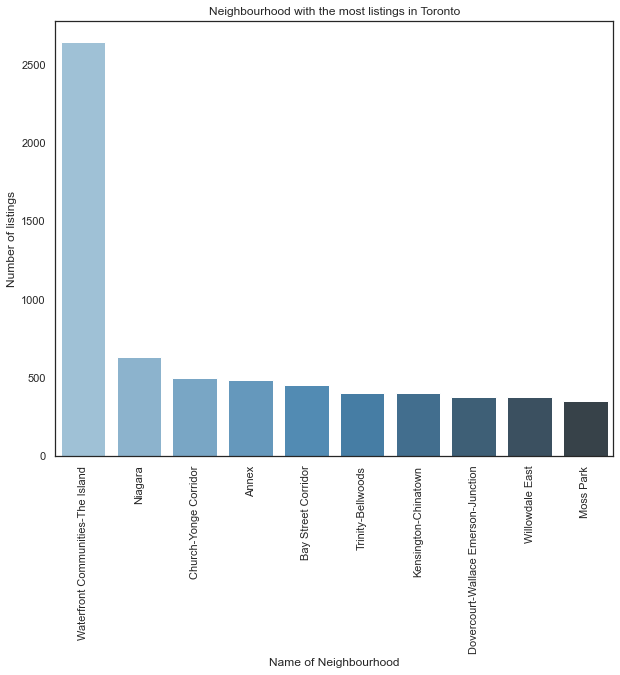

In [19]:
# Show a barplot of the top 10 neighbourhood with the most listings in Toronto
viz_1=sns.barplot(x = "Neighbourhood", y="Total_Listings", data=top_neighbourhood_df,
                 palette='Blues_d')
viz_1.set_title('Neighbourhood with the most listings in Toronto')
viz_1.set_ylabel('Number of listings')
viz_1.set_xlabel('Name of Neighbourhood')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

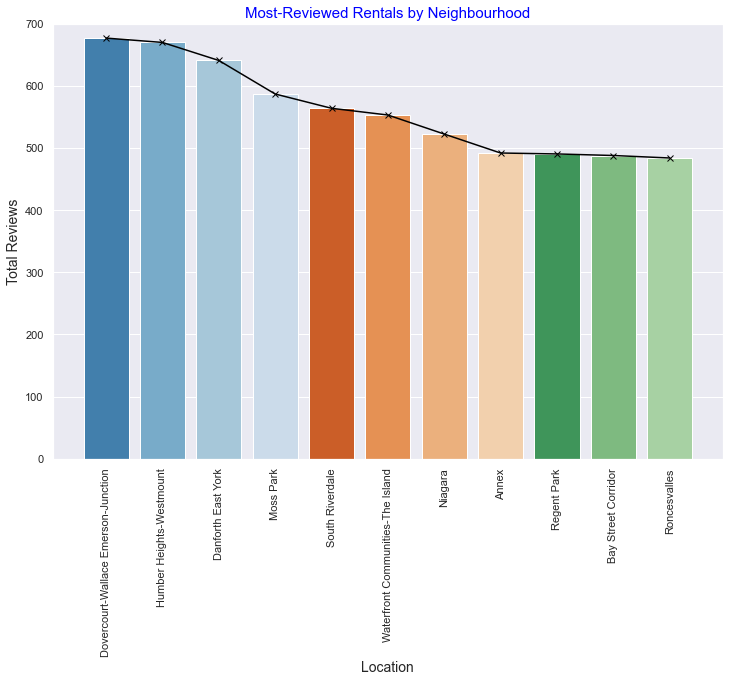

In [33]:
#Now, we will create the top 10 most reviewed rentals by the location of the neighbourhood
review = airbnb.sort_values('number_of_reviews', ascending = False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending = False).reset_index()
fig4, ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x = top_reviewed['neighbourhood'], y = top_reviewed['number_of_reviews'].values, palette = 'tab20c',ax = ax3)
plt.plot(top_reviewed['number_of_reviews'], marker = 'x', color = 'black',linestyle='-')
plt.ylabel('Total Reviews', fontsize = '14')
plt.xlabel('Location',fontsize = '14')
plt.ylim((0,700))
for ax in ax3.get_xticklabels():
    ax.set_rotation(90)
plt.title('Most-Reviewed Rentals by Neighbourhood',fontsize='15', color = "blue")
plt.show()
sns.set()

In [100]:
#Check the average price of the rental price in Toronto
average = sum(airbnb.price)/len(airbnb.price)
average

#Results around CAD$156 

156.38802704852824

<Figure size 864x576 with 0 Axes>

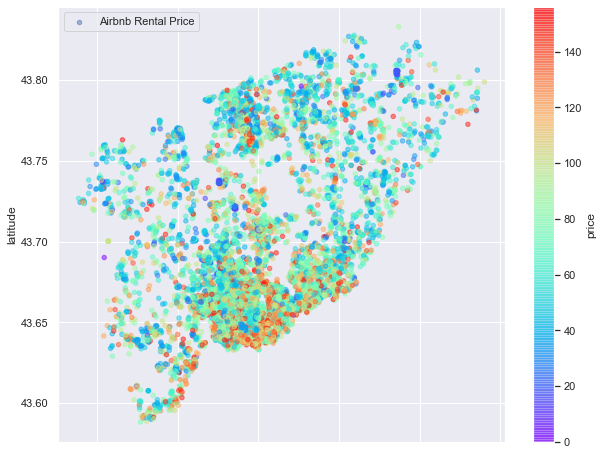

In [101]:
#We will create a scatterplot that has a price below or equal to the average price
plt.figure(figsize=(12,8)) 
ax = airbnb[airbnb.price < 156.38802704852824].plot(kind = 'scatter', x = 'longitude',y = 'latitude',label='Airbnb Rental Price',c='price',cmap=plt.get_cmap('rainbow'),colorbar = True,alpha=0.5)
ax.legend()
plt.show()